<a href="https://colab.research.google.com/github/drashyabansel/GenerativeAI/blob/main/Diffusion_in_Generative_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

In [ ]:
!pip install genaibook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 865.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from datasets import load_dataset
from diffusers import DDPMPipeline
import torch
from genaibook.core import show_images


device = "cuda"

In [ ]:
dataset = load_dataset("huggan/smithsonian_butterflies_subset", split="train")
dataset

Repo card metadata block was not found. Setting CardData to empty.


Dataset({
    features: ['image_url', 'image_alt', 'id', 'name', 'scientific_name', 'gender', 'taxonomy', 'region', 'locality', 'date', 'usnm_no', 'guid', 'edan_url', 'source', 'stage', 'image', 'image_hash', 'sim_score'],
    num_rows: 1000
})

In [ ]:
from random import sample
from torchvision import transforms
from torch.utils.data import DataLoader


image_size = 384

preprocess = transforms.Compose(
    [
      transforms.Resize((image_size, image_size)),
      transforms.RandomHorizontalFlip(),
      transforms.ToTensor(),
      transforms.Normalize([0.5], [0.5])
      ]
    )

def transform(samples):
  samples = [preprocess(sample) for sample in samples["image"]]
  return {"images": samples}

dataset.set_transform(transform)
batch_size = 16

train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
x = next(iter(train_dataloader))["images"][:8]
noise = torch.rand_like(x)

In [ ]:

def corrupt(x, noise, amount):
  amount = amount.view(-1,1,1,1)
  return x * (1-amount) + noise * amount

amount = torch.linspace(0,1,8)
noised_x = corrupt(x, noise, amount)

In [ ]:
x.shape

torch.Size([8, 3, 384, 384])

In [ ]:
amount.view(-1,1,1,1).shape

torch.Size([8, 1, 1, 1])

In [ ]:
class SimpleScheduler:
  def __init__(self):
    self.num_train_timesteps = 1000

  def add_noise(self, x, noise, timesteps):
    amount = timesteps/ self.num_train_timesteps
    return corrupt(x, noise, amount)


scheduler = SimpleScheduler()
timesteps = torch.linspace(0,999,8)
noised_x = scheduler.add_noise(x, noise, timesteps)

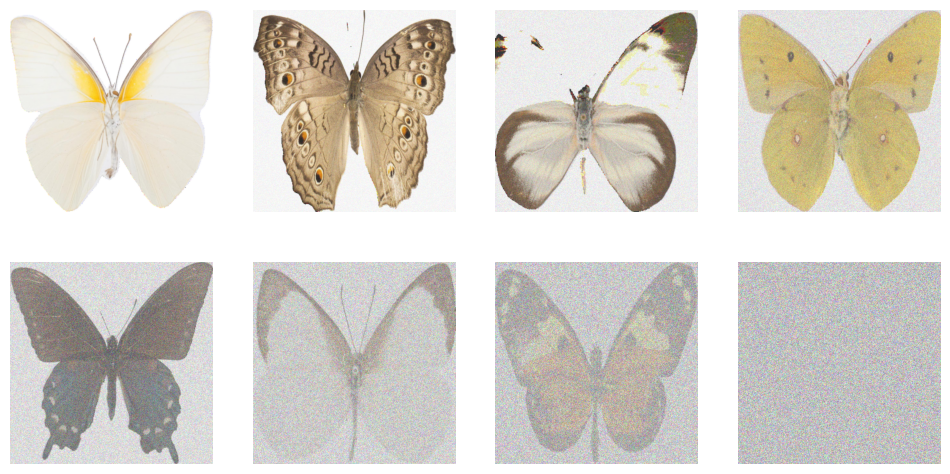

In [ ]:
show_images(noised_x * 0.5 + 0.5)

In [ ]:
from diffusers import DDPMScheduler

scheduler = DDPMScheduler(beta_end=0.01)
timesteps = torch.linspace(0, 999, 8).long()
noised_x = scheduler.add_noise(x, noise, timesteps)

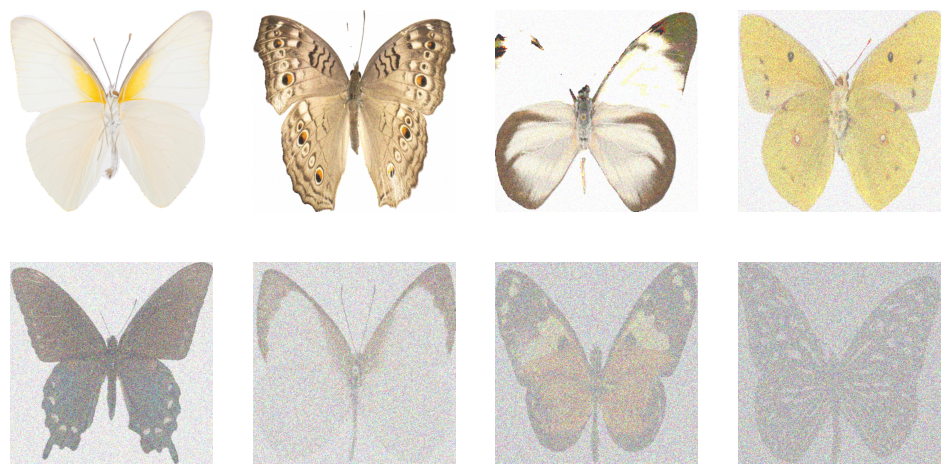

In [ ]:
show_images(noised_x * 0.5 + 0.5)

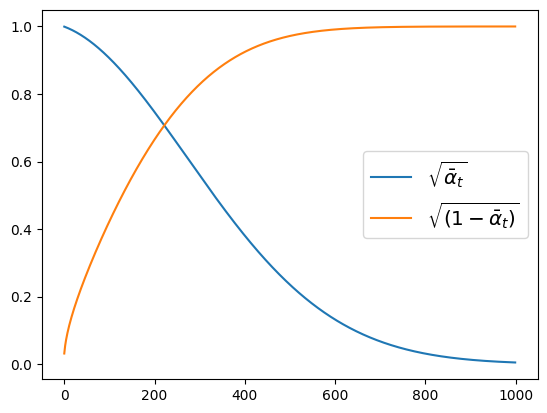

In [ ]:
from genaibook.core import plot_scheduler

plot_scheduler(
    DDPMScheduler(beta_start=0.001, beta_end=0.02, beta_schedule="linear")
)

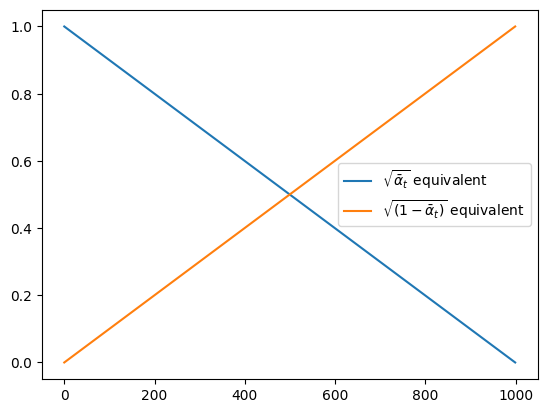

In [ ]:
plot_scheduler(SimpleScheduler())

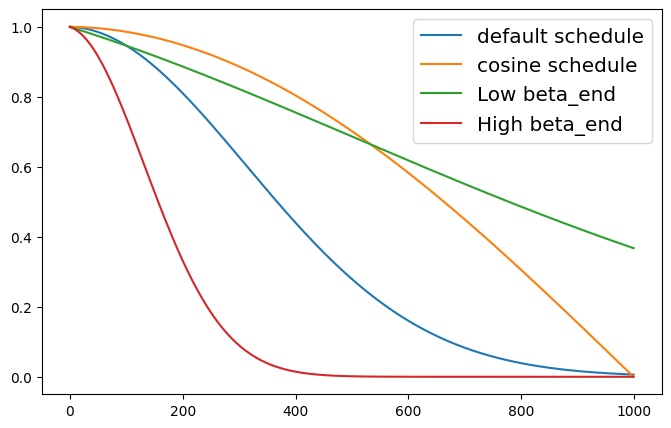

In [ ]:
import matplotlib.pyplot as plt


fig, (ax) = plt.subplots(1, 1, figsize=(8, 5))
plot_scheduler(
    DDPMScheduler(beta_schedule="linear"),
    label="default schedule",
    ax=ax,
    plot_both=False,
)
plot_scheduler(
    DDPMScheduler(beta_schedule="squaredcos_cap_v2"),
    label="cosine schedule",
    ax=ax,
    plot_both=False,
)
plot_scheduler(
    DDPMScheduler(beta_start=0.001, beta_end=0.003, beta_schedule="linear"),
    label="Low beta_end",
    ax=ax,
    plot_both=False,
)
plot_scheduler(
    DDPMScheduler(beta_start=0.001, beta_end=0.1, beta_schedule="linear"),
    label="High beta_end",
    ax=ax,
    plot_both=False,
)

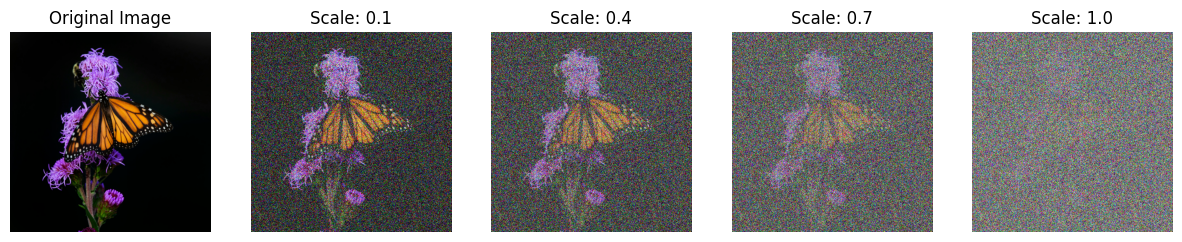

In [ ]:
import numpy as np
from genaibook.core import load_image


scheduler = DDPMScheduler(beta_end=0.05, beta_schedule="scaled_linear")
image = load_image(
    "https://images.pexels.com/photos/15403949/pexels-photo-15403949.jpeg",
    size=((512, 512)),
    return_tensor=True,
)
t = torch.tensor(300)
scales = np.linspace(0.1, 1.0 , 4)
noise = torch.randn_like(image)
images = [image]

for b in reversed(scales):
  noised = (
      scheduler.add_noise(b * (image * 2 - 1), noise, t).clip(-1,1) * 0.5 + 0.5

  )
  images.append(noised)


show_images(
 images,
 nrows=1,
 titles=["Original Image"] + [f"Scale: {b}" for b in (scales)],
 figsize=(15, 5),
)

In [ ]:
import matplotlib as mpl
from datasets import load_dataset

mpl.rcParams["image.cmap"] = "gray_r"

dataset = load_dataset("fashion_mnist")
dataset

README.md:   0%|          | 0.00/9.02k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/30.9M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/5.18M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [ ]:
clothes = dataset["train"]["image"][:8]
classes = dataset["train"]["label"][:8]

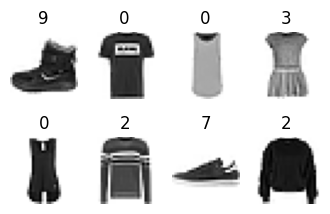

In [ ]:
from genaibook.core import show_images

show_images(clothes, titles=classes, figsize=(4, 2.5))

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader

preprocess = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Pad(2),
        transforms.Normalize([0.5], [0.5])
    ]
)


def transform(samples):
  images = [preprocess(sample) for sample in samples["image"]]
  return {"images": images, "labels":samples["label"]}


train_dataset = dataset["train"].with_transform(transform)
print(train_dataset)


train_dataloader = DataLoader(
    train_dataset, batch_size=256,
    shuffle=True
)

Dataset({
    features: ['image', 'label'],
    num_rows: 60000
})


In [ ]:
from diffusers import UNet2DModel

model = UNet2DModel(
    in_channels=1,
    out_channels=1,
    sample_size=32,
    block_out_channels=(32, 64, 128, 256),
    num_class_embeds=10
)

In [ ]:
import torch

x = torch.randn((1, 1, 32, 32))
with torch.inference_mode():
  out = model(x, timestep=7, class_labels=torch.tensor([2])).sample

out.shape

torch.Size([1, 1, 32, 32])

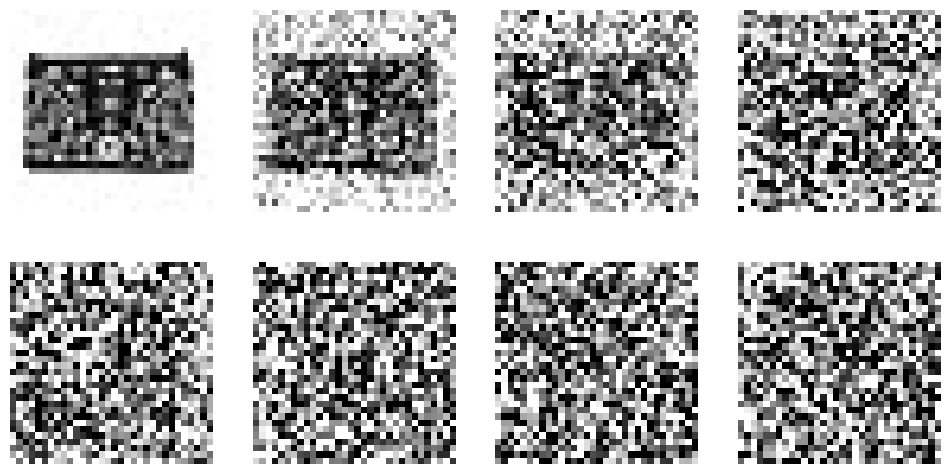

In [ ]:
from diffusers import DDPMScheduler

scheduler = DDPMScheduler(
    num_train_timesteps=1000, beta_start=0.001, beta_end=0.02
)
timesteps = torch.linspace(0, 999, 8).long()
batch = next(iter(train_dataloader))

x = batch["images"][2].expand([8,1,32,32])
noise = torch.randn_like(x)

noised_x = scheduler.add_noise(x, noise, timesteps)
show_images((noised_x * 0.5 + 0.5).clip(0, 1))

In [ ]:
from torch.nn import functional as F
from tqdm import tqdm
from genaibook.core import get_device

device = get_device()

scheduler = DDPMScheduler(
    num_train_timesteps=1000,
    beta_start=0.0001,
    beta_end=0.02
)

num_epochs = 25
lr = 3e-4
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, eps=1e-5)
losses = []

model = model.to(device)


for epoch in (progress := tqdm(range(num_epochs))):
  for step, batch in (
      inner := tqdm(
          enumerate(train_dataloader),
          position=0,
          leave=True,
          total = len(train_dataloader)
      )
  ):
    clean_images = batch["images"].to(device)
    class_label = batch["labels"].to(device)

    noise = torch.randn(clean_images.shape).to(device)

    timesteps = torch.randint(
        0,
        scheduler.config.num_train_timesteps,
        (clean_images.shape[0],),
        device=device
    ).long()

    noisy_image = scheduler.add_noise(clean_images, noise, timesteps)

    noise_pred = model(
        noisy_image,
        timesteps,
        class_labels=class_label,
        return_dict=False
    )[0]

    loss = F.mse_loss(noise_pred, noise)

    inner.set_postfix(loss=f"{loss.cpu().item():.3f}")

    losses.append(loss)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

100%|██████████| 25/25 [1:07:59<00:00, 163.17s/it]


In [ ]:
losses = [loss.item() for loss in losses]

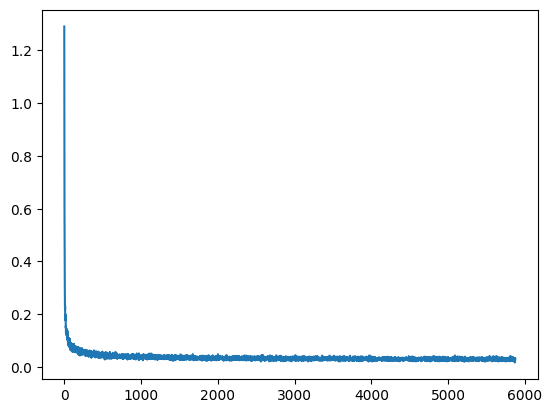

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [ ]:
def generate_from_class(class_to_generate, n_samples=8):
  sample = torch.randn(n_samples, 1, 32, 32).to(device)
  class_labels = [class_to_generate] * n_samples
  class_labels = torch.tensor(class_labels).to(device)

  for _, t in tqdm(enumerate(scheduler.timesteps)):
    with torch.inference_mode():
      noise_pred = model(sample, t, class_labels).sample

    sample = scheduler.step(noise_pred, t, sample).prev_sample

  return sample.clip(-1,1) * 0.5 + 0.5

1000it [00:28, 34.54it/s]


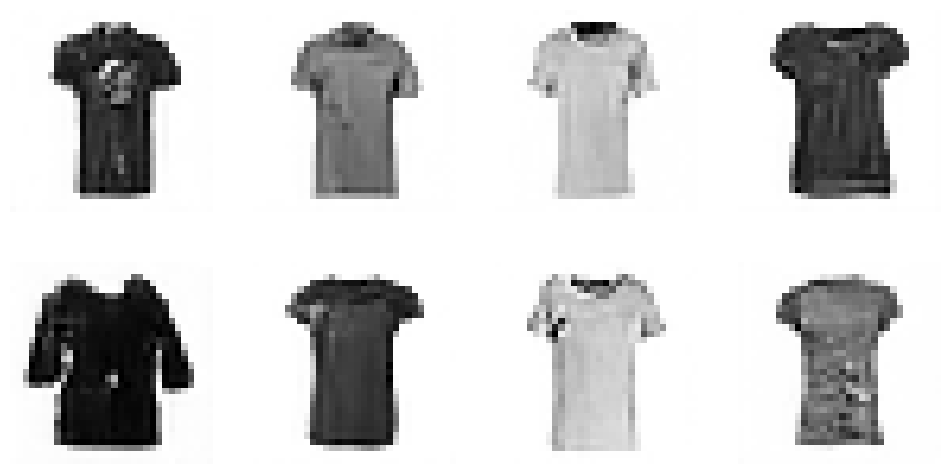

In [ ]:
images = generate_from_class(0)
show_images(images, nrows=2)

1000it [00:27, 35.91it/s]


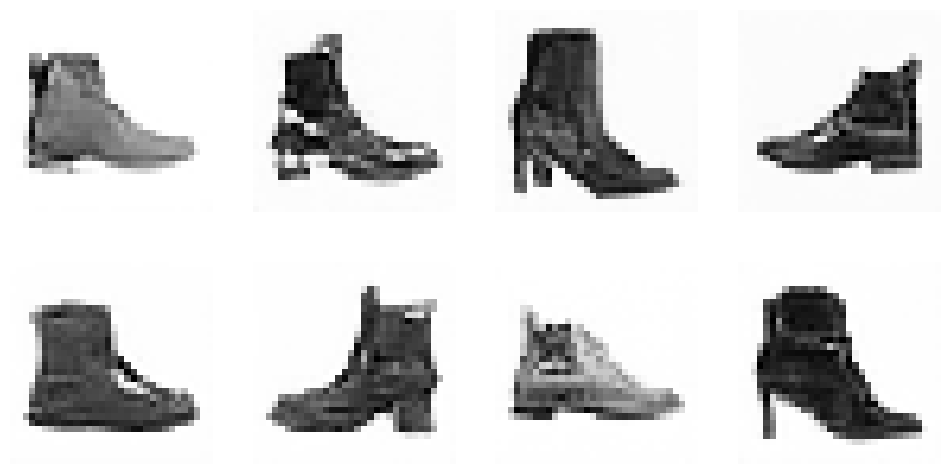

In [ ]:
images = generate_from_class(9)
show_images(images, nrows=2)